# Gradinet Boosting Regression on MCR & MT Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file = r'/content/drive/MyDrive/Colab/gbr-mcr/dataset.csv'

Data

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)
# dataset
dataset = df.values
X = dataset[:, 6] # mt column
print(len(X))
Y = dataset[:, 5] # mcr column
print(len(Y))

179996
179996


Reshape + Split

In [4]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
print("Train: ", X_train.shape)
print("Val: ", X_val.shape)
print("Test: ", X_test.shape)

Train:  (115196, 1)
Val:  (28800, 1)
Test:  (36000, 1)


Model

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

# model
gbr = GradientBoostingRegressor(subsample=0.8,
                                learning_rate=0.4,
                                n_estimators=15,
                                max_depth=8,
                                min_samples_split=200,
                                min_samples_leaf=40,
                                loss="absolute_error")

Fit + Predict

In [6]:
# fit
gbr.fit(X_train, Y_train)

# prediction
Y_predict = gbr.predict(X_test)

Errors

In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, Y_predict)
mape = mean_absolute_percentage_error(Y_test, Y_predict)
print("MAPE : ", mape)
print("MAE : ", mae)

MAPE :  11.527824832371733
MAE :  8.929878438876651


Plot

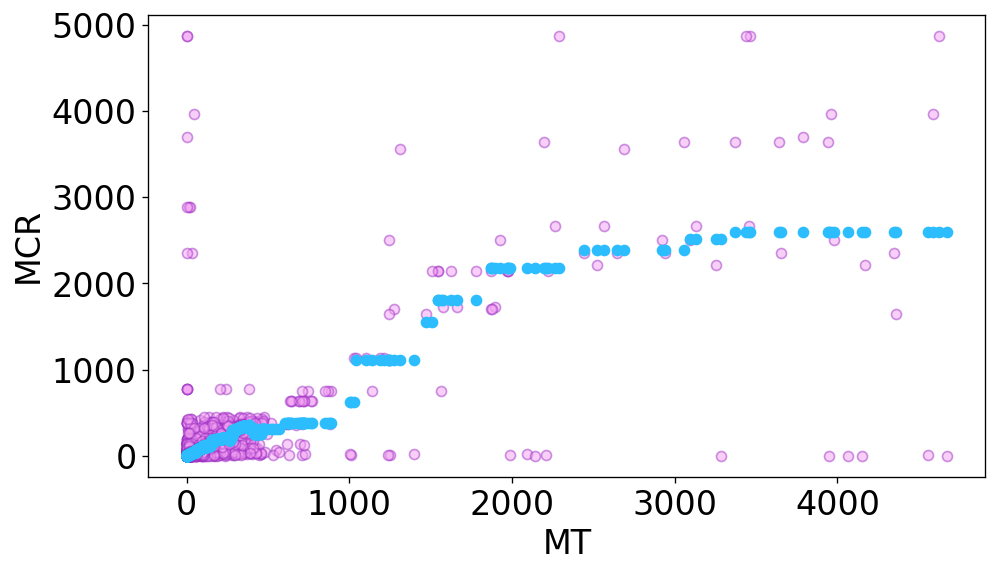

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X_test, y=Y_test, color="#F3A0F2", marker="o",alpha=0.5, edgecolors="#9D2EC5")
plt.subplot().tick_params(labelsize=20)
plt.scatter(x=X_test, y=Y_predict, color="#2CBDFE", linewidth=1)
plt.ylabel('MCR', fontsize=20)
plt.xlabel('MT', fontsize=20)
plt.show()

Loss Curve

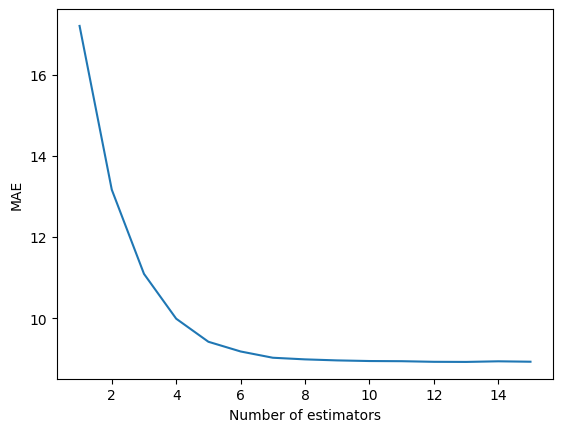

In [9]:
mae = []
for Y_predict in gbr.staged_predict(X_test):
    mae.append(mean_absolute_error(Y_test, Y_predict))

plt.plot(np.arange(1, gbr.n_estimators + 1), mae)
plt.xlabel("Number of estimators")
plt.ylabel("MAE")
plt.show()

Graph

25.004356780169225    26.744937358610525


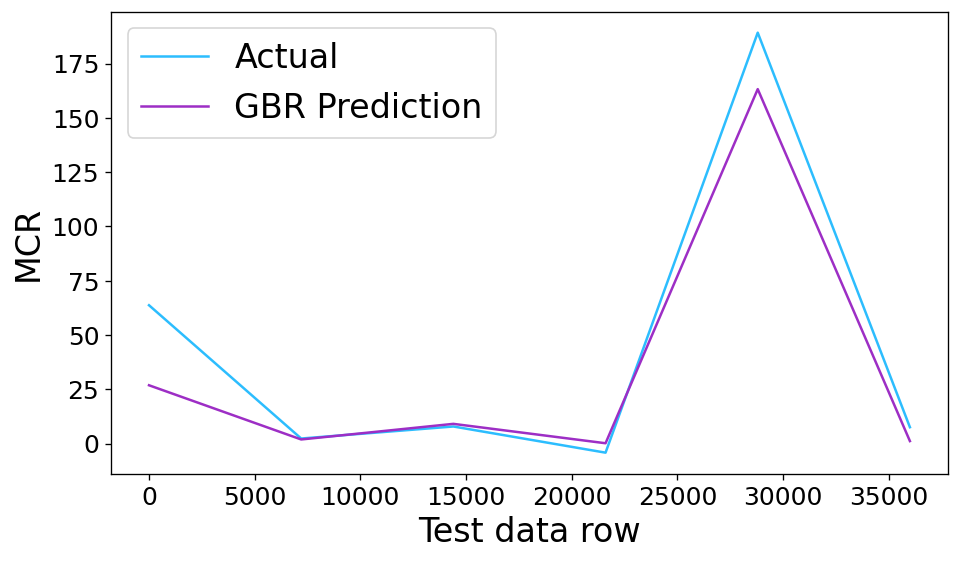

In [10]:
from scipy.interpolate import make_interp_spline

print(np.average(Y_predict), "  ", np.average(Y_test))
plt.figure(figsize=(9, 5), dpi=120)
X_Y_Spline = make_interp_spline(np.arange(36000), Y_test)

X_ = np.linspace(np.arange(36000).min(), np.arange(36000).max(), 6)
Y_ = X_Y_Spline(X_)

plt.plot(X_,Y_, label='Actual', color="#2CBDFE")
X_Y_Spline = make_interp_spline(np.arange(36000), Y_predict)
X_ = np.linspace(np.arange(36000).min(), np.arange(36000).max(), 6)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_,  label='GBR Prediction', color="#9D2EC5")
plt.subplot().tick_params(labelsize=15)
plt.ylabel('MCR', fontsize=20)
plt.xlabel('Test data row', fontsize=20)
plt.legend(fontsize=20)
plt.show()